In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import Perceptron as sklearn_pt


In [ ]:
titanic_df = pd.read_csv('tan.csv')

## Data Analysis

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.drop(labels=['Name', 'Cabin', 'Parch', 'SibSp', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [ ]:
survived = titanic_df['Survived']

In [ ]:
titanic_df.drop(['Survived'], axis=1, inplace=True)

In [ ]:
titanic_df.head()

,PassengerId,Pclass,Sex,Age,Fare
0,1,3,male,22.0,7.2500
1,2,1,female,38.0,71.2833
2,3,3,female,26.0,7.9250
3,4,1,female,35.0,53.1000
4,5,3,male,35.0,8.0500


In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [ ]:
titanic_df.head()

,PassengerId,Pclass,Sex,Age,Fare
0,1,3,male,22.0,7.2500
1,2,1,female,38.0,71.2833
2,3,3,female,26.0,7.9250
3,4,1,female,35.0,53.1000
4,5,3,male,35.0,8.0500


In [ ]:
titanic_df = pd.get_dummies(titanic_df, columns=['Sex'], prefix='Sex')

In [ ]:
titanic_df['Pclass'] = titanic_df['Pclass'].round().astype(int)
titanic_df['Age'] = titanic_df['Age'].round().astype(int)

In [ ]:
titanic_df.drop(['Fare'], inplace=True, axis=1)

In [ ]:
titanic_df.head()

,PassengerId,Pclass,Age,Sex_female,Sex_male
0,1,3,22,0,1
1,2,1,38,1,0
2,3,3,26,1,0
3,4,1,35,1,0
4,5,3,35,0,1


## Building a model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df, survived, test_size=0.30, random_state=42)

In [ ]:
class Perceptron:

    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_func(self, z):
        return np.heaviside(z, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.epochs):
            for j in range(n_samples):
                z = np.dot(X.iloc[j], self.weights) + self.bias
                y_pred = self.activation_func(z)
                loss = (y.iloc[j]-y_pred)

                self.weights += self.learning_rate*loss*X.iloc[j]
                self.bias += self.learning_rate*loss

    def predict(self, X):
        pred = []
        n_samples, n_features = X.shape
        for i in range(n_samples):
            z = np.dot(X.iloc[i], self.weights) + self.bias
            pred.append(self.activation_func(z))
        return pred

In [ ]:
model = Perceptron(0.001, 30)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.4216417910447761


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.04      0.07       157
           1       0.41      0.96      0.58       111

    accuracy                           0.42       268
   macro avg       0.51      0.50      0.33       268
weighted avg       0.52      0.42      0.28       268



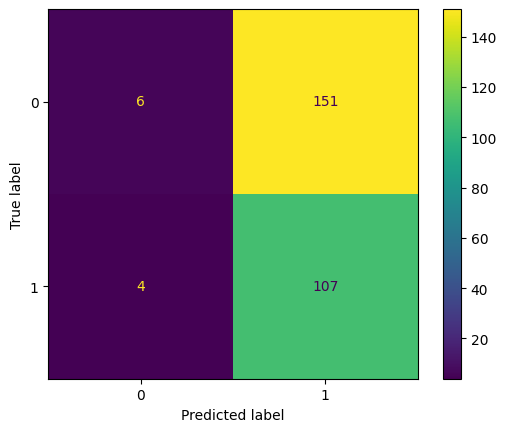

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_mat).plot()

# GridSearchCV

In [ ]:
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
              'max_iter': [10, 50, 100, 200, 500]}

grid_search = GridSearchCV(cv=5, estimator=sklearn_pt(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_iter': [10, 50, 100, 200, 500]},
             scoring='accuracy')
best_params = grid_search.fit(X_train, y_train)
print("Best Parameters:", best_params.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.0001, 'max_iter': 50}


In [ ]:
sklearn_model = sklearn_pt(alpha=0.0001, max_iter=50)
sklearn_model.fit(X_train, y_train)

Perceptron(max_iter=50)

In [ ]:
pred_sk = sklearn_model.predict(X_test)
report = classification_report(y_test, pred_sk)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.17      0.26       157
           1       0.42      0.86      0.57       111

    accuracy                           0.46       268
   macro avg       0.53      0.52      0.42       268
weighted avg       0.55      0.46      0.39       268



In [ ]:
model = Perceptron(0.0001, 50)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.04      0.08       157
           1       0.41      0.95      0.58       111

    accuracy                           0.42       268
   macro avg       0.50      0.50      0.33       268
weighted avg       0.51      0.42      0.29       268



# Iris

In [ ]:
iris = pd.read_csv('/content/Iris.csv')

In [ ]:
iris.dropna(inplace=True)

In [ ]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
y = iris['Species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [ ]:
X = iris.drop(columns=['Species', 'Id'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
              'max_iter': [10, 50, 100, 200, 500]}

grid_search = GridSearchCV(cv=5, estimator=sklearn_pt(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'max_iter': [10, 50, 100, 200, 500]},
             scoring='accuracy')
best_params = grid_search.fit(X_train, y_train)
print("Best Parameters:", best_params.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best Parameters: {'alpha': 0.0001, 'max_iter': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sklearn_model = sklearn_pt(alpha=0.0001, max_iter=50)
sklearn_model.fit(X_train, y_train)

pred_sk = sklearn_model.predict(X_test)
report = classification_report(y_test, pred_sk)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.31      0.47        13
           2       0.59      1.00      0.74        13

    accuracy                           0.80        45
   macro avg       0.86      0.77      0.74        45
weighted avg       0.88      0.80      0.77        45



In [ ]:
model = Perceptron(0.0001, 50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.29      1.00      0.45        13
           2       0.00      0.00      0.00        13

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
